# Nanoparticle Synthesis Optimization


<sup>Note: To execute the Notebook with R cells, the runtime type has to be set to R instead of python</sup>

In the following code cell, all required packages are loaded or installed if they're missing

In [19]:

# Install and load pacman package
if (!require("pacman")) install.packages("pacman")
capture.output(library(pacman), file = NULL)

# Load packages quietly using capture.output
capture.output(p_load(DBI,RMySQL, getPass, dplyr, ggplot2, tidyr, ggcorrplot, broom, visdat,skimr, vtable, gridExtra, GGally,mgcv, caret, pROC, keras), file = NULL);

character(0)

character(0)

# Load data from the database

* connect with the database by entering the password
* after the data from the table is loaded and saved in a data tibble (similar to a data frame) the connection is closed

In [2]:
# Use getPass to prompt for the password
db_password <- getPass::getPass("Enter your database password: ")

# Establish the connection
connect <- dbConnect(
  RMySQL::MySQL(),
  host = "den1.mysql6.gear.host",
  user = "situation",
  password = db_password,
  dbname = "situation"
)

# Define the SQL query to fetch data from the specific table
query <- "SELECT * FROM r18_nanoparticle_experiments"

# Execute the query and store the result in a data frame
data_tbl <- as_tibble(dbGetQuery(connect, query))%>%
  mutate(across(everything(), as.numeric))

# Remember to disconnect when done
dbDisconnect(connect)

Enter your database password: ··········


[1] TRUE

# Descriptive Data Analysis of the Nanoparticle Dataset

## Introduction (Why?)

Descriptive statistics provide simple summaries about the sample and the measures. Along with simple graphics analysis, they form the basis of virtually every quantitative analysis of data. Descriptive statistics allow us to understand the basic features of the data, providing simple summaries and graphical representations. This step is crucial before moving to exploratory data analysis (EDA) and statistical modelling, as it helps to identify patterns, outliers, and relationships in the data.

1. Testing if there are missing values in the dataset

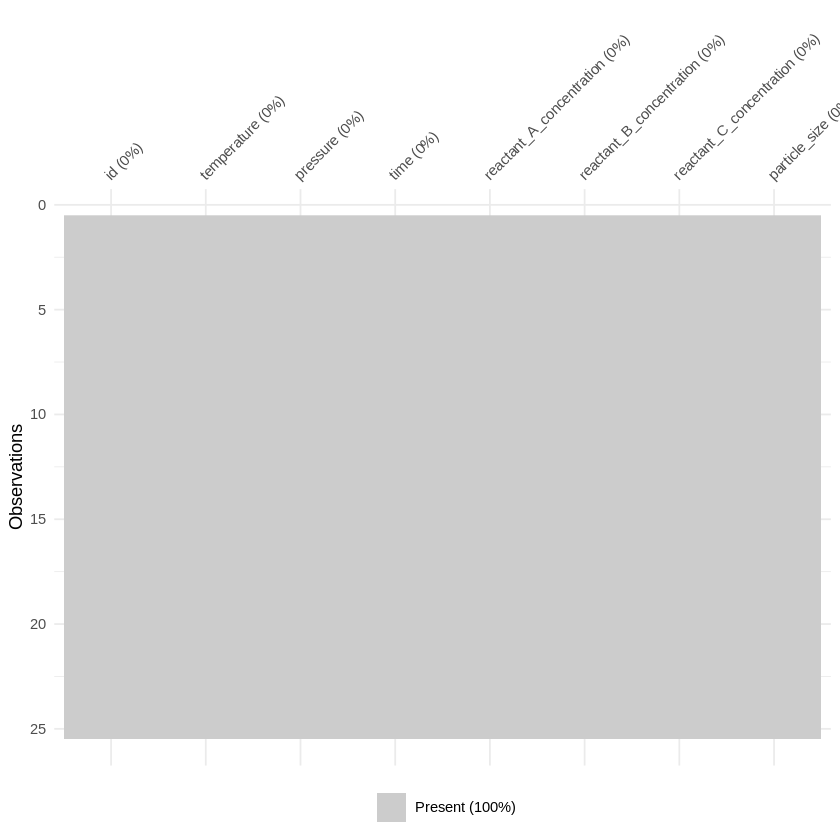

In [3]:
# Visualise missing values
vis_miss(data_tbl)

It can be seen with the visualization that all values are present. This ensures that the dataset is complete and the further analysis can be proceeded without the need for imputation or handling of missing data.

**Next step:**

2. Have a look at some statistic values like min, max, mean, SD etc.

In [4]:
# Create a summary statistics table with sumtable, exclude the id column and format the column names
sumtable(data_tbl %>% select(-id),add.median=TRUE,out = 'return',summ.names = list(c('N','Mean','Std. Dev.','Min','25% Percentile','Median (50%)','75% Percentile','Max')))%>%
   mutate(across(-c(Variable), as.numeric))

 # Using skimr to create a static summary without the `id` column
 skim_tee(data_tbl %>% select(-id))

Variable,N,Mean,Std. Dev.,Min,25% Percentile,Median (50%),75% Percentile,Max
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
temperature,25,309.00,8.80,295.0,300.0,310.0,315.0,325.0
pressure,25,1.70,0.16,1.4,1.5,1.7,1.8,1.9
time,25,2.90,0.19,2.5,2.8,2.9,3.1,3.2
reactant_A_concentration,25,0.73,0.11,0.6,0.6,0.7,0.8,0.9
reactant_B_concentration,25,0.58,0.13,0.4,0.5,0.6,0.7,0.8
reactant_C_concentration,25,0.38,0.13,0.2,0.3,0.4,0.5,0.6
particle_size,25,52.00,4.30,45.0,49.0,52.0,55.0,60.0


── Data Summary ────────────────────────
                           Values
Name                       data  
Number of rows             25    
Number of columns          7     
_______________________          
Column type frequency:           
  numeric                  7     
________________________         
Group variables            None  

── Variable type: numeric ──────────────────────────────────────────────────────
  skim_variable            n_missing complete_rate    mean    sd    p0   p25
1 temperature                      0             1 309.    8.84  295   300  
2 pressure                         0             1   1.65  0.161   1.4   1.5
3 time                             0             1   2.94  0.193   2.5   2.8
4 reactant_A_concentration         0             1   0.732 0.107   0.6   0.6
5 reactant_B_concentration         0             1   0.584 0.128   0.4   0.5
6 reactant_C_concentration         0             1   0.384 0.128   0.2   0.3
7 particle_size                 

## Choice of units:
 With the distributions of each variable, it was possible to name the units for each measure. The chosen units are:

  - Temperature: [K]
  - Pressure: [bar]
  - Time: [s]
  - Reactant A Concentration: [mol/L]
  - Reactant B Concentration: [mol/L]
  - Reactant C Concentration: [mol/L]
  - Particle Size: [nm]

The choice of units is based on standard scientific measurements commonly used in nanoparticle synthesis.

## Summary and Conclusion
The descriptive statistics provide a clear overview of the dataset:

  ### Temperature (K):

  The temperature values range from 295 K to 325 K with a mean of 309 K and a standard deviation of 8.8 K. The median temperature is 310 K. These values indicate that the temperatures are centred around 310 K with a relatively small spread, indicating consistency in temperature conditions.

  ### Pressure (bar):

  The pressure values range from 1.4 bar to 1.9 bar with a mean of 1.70 bar and a standard deviation of 0.16 bar. The median pressure is as well 1.70 bar. This suggests that the pressure values are closely packed around 1.70 bar, showing minimal variation.

  ### Time (s):

  The time values range from 2.5 s to 3.2 s with a mean of 2.90 s and a standard deviation of 0.19 s. The median time is also 2.9 s. The time variable shows moderate variation with a median close to the mean.

  ### Reactant A Concentration (mol/L):

  The concentrations of Reactant A range from 0.6 mol/L to 0.9 mol/L with a mean of 0.73 mol/L and a standard deviation of 0.11 mol/L. The median concentration is 0.7 mol/L. This indicates that concentrations of Reactant A are mostly around 0.7 mol/L, suggesting controlled experimental conditions.

  ### Reactant B Concentration (mol/L):

  The concentrations of Reactant B range from 0.4 mol/L to 0.8 mol/L with a mean of 0.58 mol/L and a standard deviation of 0.13 mol/L. The median concentration is 0.6 mol/L. Reactant B concentrations are well-distributed with no extreme outliers.

  ### Reactant C Concentration (mol/L):

  The concentrations of Reactant C range from 0.2 mol/L to 0.6 mol/L with a mean of 0.38 mol/L and a standard deviation of 0.13 mol/L. The median concentration is 0.4 mol/L. Reactant C shows similar distribution patterns to Reactant B.

  ### Particle Size (nm):

  The particle sizes range from 45 nm to 60 nm with a mean of 52 nm and a standard deviation of 4.3 nm. The median particle size is 52 nm. The particle sizes are fairly consistent with a tight spread around the mean.

  These summaries provide a clear overview of the dataset and indicate that the variables are generally well-behaved with no significant anomalies.

 **Next step:**

3. Visualize the distribution of each variable

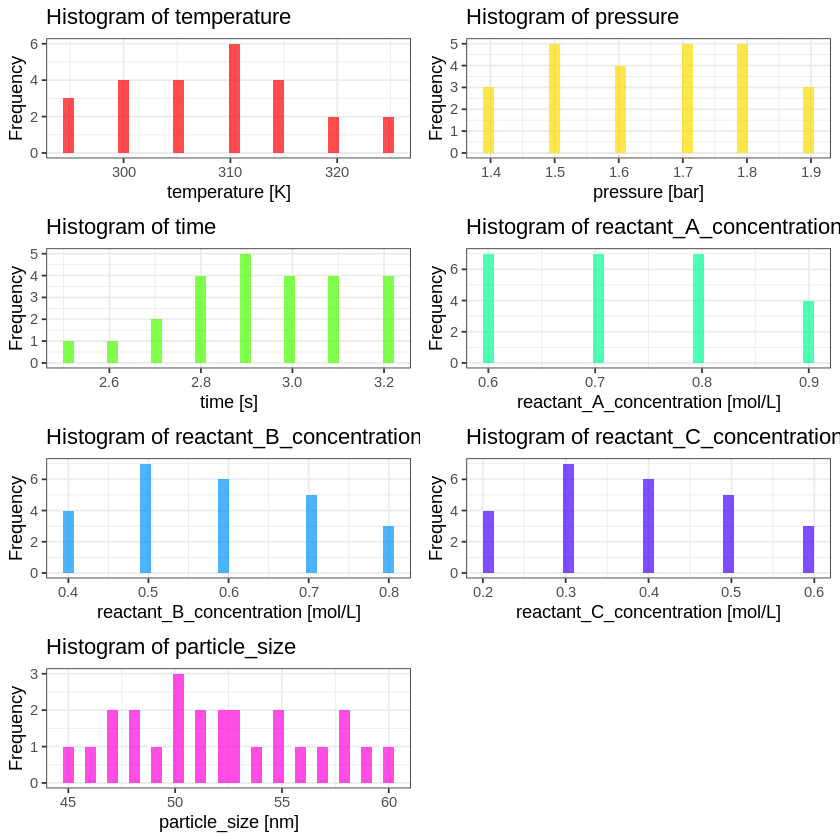

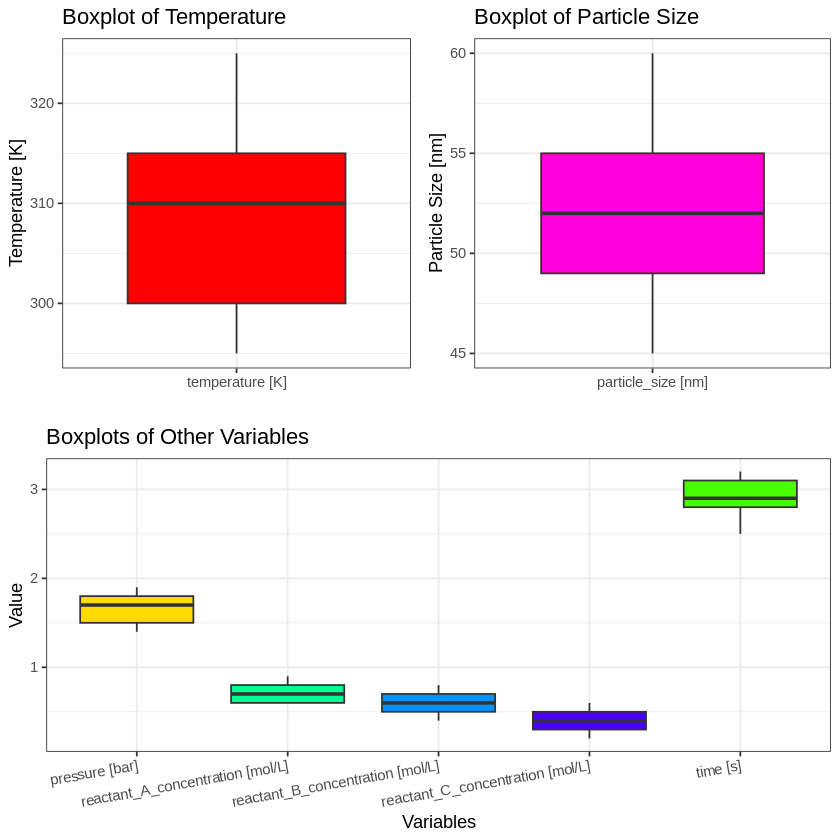

In [22]:
# Create histograms and boxplots for each variable
variables <- colnames(data_tbl)[-1]  # all columns except 'id'
colors <- rainbow(length(variables))

# Determined units for the varibles
units <- c("[K]", "[bar]", "[s]", "[mol/L]", "[mol/L]", "[mol/L]", "[nm]")

# Function to create plots with units in the axis descriptions
create_plots <- function(data, var, color, unit) {
  p1 <- ggplot(data, aes(x = !!sym(var))) +
    geom_histogram(bins = 30, fill = color, alpha = 0.7) +
    theme_bw() +
    labs(title = paste("Histogram of", var), x = paste(var, unit), y = "Frequency")

  p2 <- ggplot(data, aes(y = !!sym(var))) +
    geom_boxplot(fill = color, alpha = 0.7) +
    theme_bw() +
    labs(title = paste("Boxplot of", var), x = "", y = paste(var, unit))

  list(histogram = p1, boxplot = p2)
}

# Create plots
plot_list <- Map(function(v, c, u) create_plots(data_tbl, v, c, u), variables, colors, units)

# Show all histograms in one plot
plot_histograms <- lapply(plot_list, `[[`, "histogram")
grid.arrange(grobs = plot_histograms, ncol = 2)

# Prepare the data for the boxplots
# Excluding temperature and particle_size because of larger values
boxplot_data <- data_tbl %>%
  select(-c(temperature, particle_size)) %>%
  pivot_longer(cols = -id, names_to = "variable", values_to = "value")

# Prepare boxplot data for temperature and particle_size separately
temperature_data <- data_tbl %>%
  select(id, temperature) %>%
  pivot_longer(cols = -id, names_to = "variable", values_to = "value")

particle_size_data <- data_tbl %>%
  select(id, particle_size) %>%
  pivot_longer(cols = -id, names_to = "variable", values_to = "value")

# Units for the variables excluding temperature and particle_size in order
units_others <- c("[bar]", "[mol/L]", "[mol/L]", "[mol/L]", "[s]")

# Customised labels for the facets
labels <- paste(variables[c(2,4:6,3)], units_others, sep = " ")

# Boxplots without temperature and particle_size
boxplot_others <- ggplot(boxplot_data, aes(x = variable, y = value, fill = variable)) +
  geom_boxplot() +
  theme_bw() +
  scale_fill_manual(values = colors[c(2,4:(length(colors)-1),3)]) +
  theme(legend.position = "none", axis.text.x = element_text(angle = 10, hjust = 1)) +
  scale_x_discrete(labels = labels) +
  labs(title = "Boxplots of Other Variables", x = "Variables", y = "Value")

# Boxplot for temperature
boxplot_temperature <- ggplot(temperature_data, aes(x = variable, y = value, fill = variable)) +
  geom_boxplot() +
  theme_bw() +
  scale_fill_manual(values = colors[1]) +
  theme(legend.position = "none") +
  scale_x_discrete(labels = paste(variables[c(1)], "[K]", sep = " ")) +
  labs(title = "Boxplot of Temperature", x = "", y = "Temperature [K]")

# Boxplot for particle_size
boxplot_particle_size <- ggplot(particle_size_data, aes(x = variable, y = value, fill = variable)) +
  geom_boxplot() +
  theme_bw() +
  scale_fill_manual(values = colors[length(colors)]) +
  theme(legend.position = "none") +
  scale_x_discrete(labels = paste(variables[c(7)], "[nm]", sep = " ")) +
  labs(title = "Boxplot of Particle Size", x = "", y = "Particle Size [nm]")

# Displaying the boxplots in a single layout
grid.arrange(
  arrangeGrob(boxplot_temperature, boxplot_particle_size, ncol = 2),
  boxplot_others,
  ncol = 1
)

## Histogram and Boxplot Analysis:
* **Temperature:** The histogram shows that most temperature values are clustered around 310 K, indicating a narrow distribution with a few outliers at the lower and upper extremes.
* **Pressure:** The pressure values are tightly clustered around 1.7 bar, reflecting a controlled environment with minimal variation.
* **Time:** The time variable shows a slight right-skew, indicating that most synthesis processes are completed within a shorter time frame with some taking longer.
* **Reactant Concentrations:** All reactant concentrations (A, B, and C) exhibit that they are not normally distributed.
* **Particle Size:** The particle size distribution is centred around 52 nm with a few outliers, showing consistent synthesis results with minimal variability.


4. Test for correlations

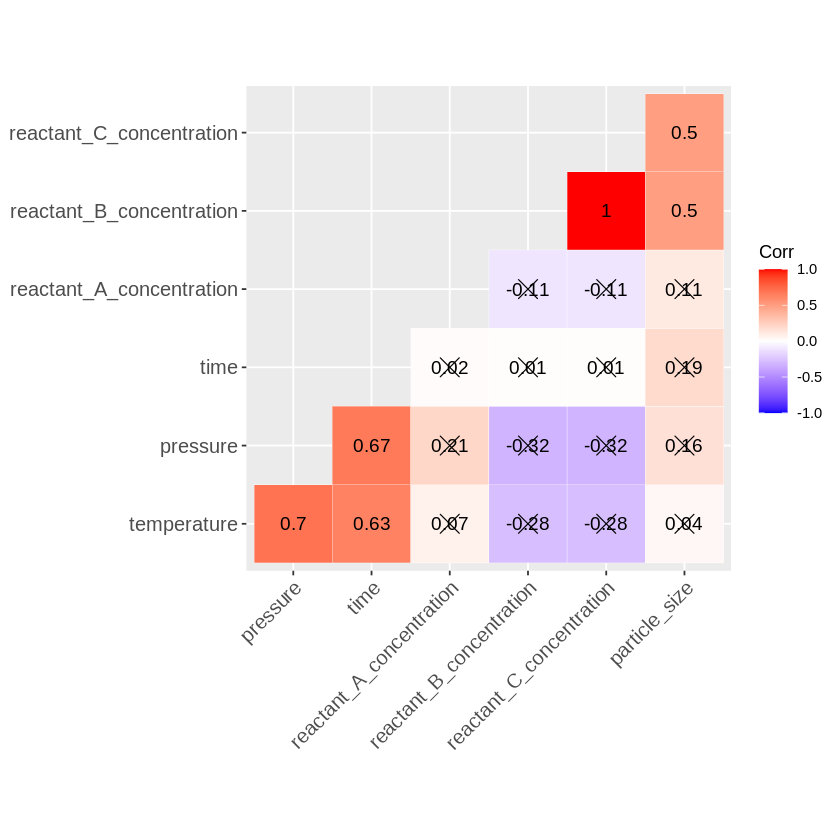

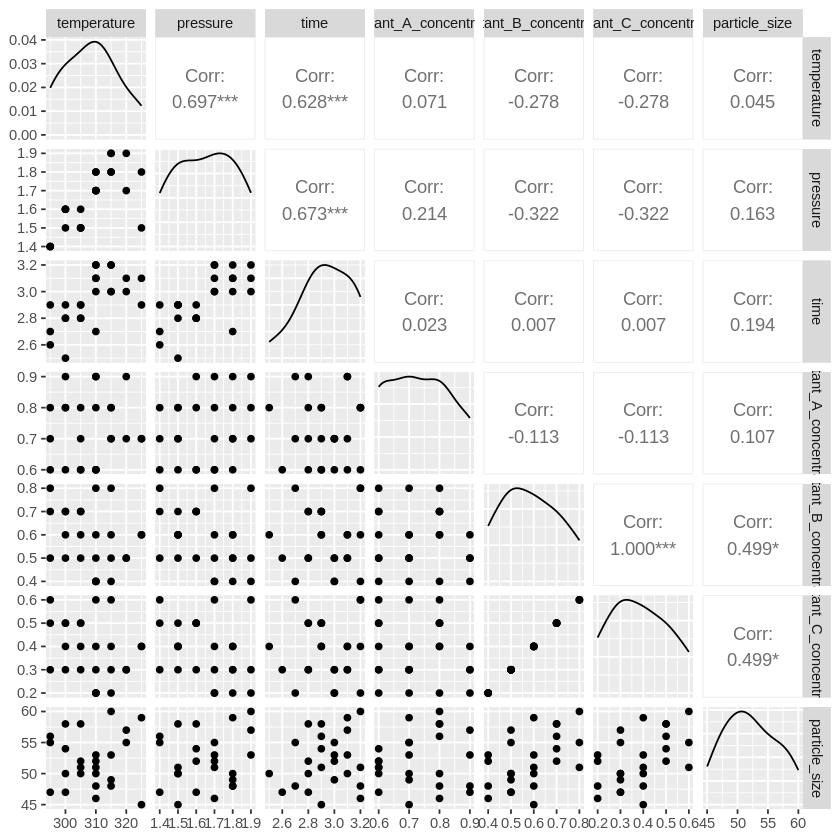

In [6]:
# Compute correlations and their significances (p.mat)
cor_matrix <- cor(data_tbl %>% select(-id))
write.csv(cor_matrix, "cor_matrix.csv", row.names = FALSE)
p.mat <- cor_pmat(data_tbl %>% select(-id))

# Heatmap of correlations
# Note: A 'X' means that the correlation is not significant
heatmap <- ggcorrplot(cor_matrix, lab = TRUE,outline.col = "white", ggtheme = ggplot2::theme_gray,p.mat = p.mat, type = "lower")

# Scatter Plots
scatter_plots <- ggpairs(data_tbl %>% select(-id))

# Show heatmap
print(heatmap)

# Show Scatter Plots
print(scatter_plots)

## Summary and Conclusions
The correlations in the dataset reveal interesting relationships between the variables:

* **Temperature and Pressure:**

  - The correlation between temperature and pressure is moderately positive (r ~ 0.70), suggesting that higher temperatures are associated with an increase in pressure.

* **Temperature and Time:**

  - There is a moderate positive correlation between temperature and time (r ~ 0.63), indicating that longer synthesis times are associated with higher temperatures.

* **Pressure and Time:**

  - There is also a moderate positive correlation between pressure and time (r ~ 0.67), suggesting that longer synthesis times are associated with higher pressure.

* **Reactant Concentrations:**

  - The concentrations of Reactant A and B show a weak negative correlation (r ~ -0.28), as do the concentrations of Reactant A and C. This suggests that higher concentrations of Reactant A are slightly associated with lower concentrations of Reactants B and C.
  - Reactant B and Reactant C concentrations are perfectly correlated (r ~ 1.00), indicating they were likely varied together.
  - Reactant B and C concentrations have a moderate positive correlation with particle size (r ~ 0.50), suggesting that higher concentrations of Reactants B and C are associated with larger particle sizes.

* **Time and Particle Size:**

  - There is a weak positive correlation between time and particle size (r ~ 0.19), indicating that longer synthesis times tend to result in slightly larger particle sizes.

* **Other Correlations:**

  - The other correlations are relatively weak, showing no strong dependencies between the remaining variables.

### Heatmap Analysis:

The heatmap visualizes these correlations, highlighting the relationships between the variables. Significant correlations (temperature-pressure, temperature-time, pressure-time) are clearly visible.

### Scatter Plot Analysis:
The scatter plots provide a visual confirmation of the correlations. Trends between temperature and time as well as pressure and time are evident, as are the weak relationships between the reactants.

# Final Summary
The descriptive analysis of the nanoparticle dataset has provided key insights into the distributions and relationships of the variables. The temperature, pressure, and time exhibit consistent and controlled conditions during the synthesis processes. The concentrations of Reactants B and C vary together, indicating a linked variation, while Reactant A varies independently. The particle size is relatively consistent, indicating successful synthesis.

The correlations between temperature, pressure, and time suggest that longer synthesis times are associated with higher temperatures and higher pressure. The positive correlation between Reactants B and C with particle size suggests that their concentrations influence the particle size, which might indicate the need to adjust conditions to achieve optimal results.

This descriptive analysis forms the basis for further exploratory data analysis and statistical modelling aimed at optimizing the synthesis processes and improving the quality of the produced nanoparticles.



# Explorative Data Analysis of the Nanoparticle Dataset

5. Testing for Normal Distribution

Before the exploratory data analysis and modelling, it is crucial to determine whether the data follows a normal distribution. This will inform whether the use of parametric or non-parametric statistical tests is required. Therefore, the Shapiro-Wilk test for normality is used, which is suitable for small to medium-sized datasets.

In [7]:
# Shapiro-Wilk test for normality
data_tbl %>%
  select(-id) %>%
  gather(key = "variable", value = "value") %>%
  group_by(variable) %>%
  do(tidy(shapiro.test(.$value))) %>%
  mutate(normality = ifelse(p.value > 0.05, "normally distributed", "not normally distributed")) %>%
  select(-method)

variable,statistic,p.value,normality
<chr>,<dbl>,<dbl>,<chr>
particle_size,0.9676215,0.585534371,normally distributed
pressure,0.9268236,0.073423630,normally distributed
reactant_A_concentration,0.8699705,0.004320143,not normally distributed
reactant_B_concentration,0.9139739,0.037417829,not normally distributed
reactant_C_concentration,0.9139739,0.037417829,not normally distributed
temperature,0.9488080,0.235647971,normally distributed
time,0.9470090,0.214478440,normally distributed


In [8]:
# Pearson-Correlations for normally distributed variables
cor(data_tbl %>% select(temperature, pressure, time, particle_size))
# Spearman-Correlations for not normally distributed variables
cor(data_tbl %>% select(reactant_A_concentration, reactant_B_concentration, reactant_C_concentration), method = "spearman")

,temperature,pressure,time,particle_size
temperature,1.00000000,0.6970927,0.6277519,0.04471975
pressure,0.69709272,1.0000000,0.6732315,0.16279086
time,0.62775188,0.6732315,1.0000000,0.19417144
particle_size,0.04471975,0.1627909,0.1941714,1.00000000


,reactant_A_concentration,reactant_B_concentration,reactant_C_concentration
reactant_A_concentration,1.00000000,-0.08822244,-0.08822244
reactant_B_concentration,-0.08822244,1.00000000,1.00000000
reactant_C_concentration,-0.08822244,1.00000000,1.00000000


## Conclusion and Next Steps
### Implications of Correlation Results:
#### Strong Correlations:

The strong positive correlations between temperature, pressure, and time indicate that these variables are closely related in the synthesis process. Adjusting one of these parameters is likely to affect the others.

### Weak Correlations with Particle Size:

The weak correlations between particle size and the other normally distributed variables suggest that these variables might not be the primary drivers of particle size variation. Other factors, such as reactant concentrations or more complex interactions, might play a more significant role.

### Reactant Concentrations:

The perfect correlation between Reactant B and Reactant C concentrations suggests that these were controlled together, while Reactant A was varied independently. This independence should be considered when building models to predict particle size.

### Statistical Testing:
Based on the distribution and correlation results, the appropriate statistical tests for further analysis can be determined in the following.

## Model Justification and Endpoint Selection
Before setting up the model, it's essential to explain the rationale behind the modelling approach and why predicting particle size is a meaningful endpoint.

### Why Predict Particle Size?
Key Quality Attribute: Particle size is a critical quality attribute in nanoparticle synthesis, influencing the physical, chemical, and biological properties of nanoparticles. Smaller particles typically have higher surface area-to-volume ratios, enhancing their reactivity and functionality in various applications.

* Process Optimization: Understanding the factors that influence particle size can help in optimizing the synthesis process. By identifying the significant predictors of particle size, the synthesis parameters to achieve desired particle sizes more consistently can be adjusted.

* Scalability: Predicting particle size allows for scalability in production. By establishing a reliable model, it becomes easier to scale up the process while maintaining the desired particle characteristics.

### Why Use a Mixed Approach?
Given that the data includes both normally and non-normally distributed variables, a mixed approach using both parametric and non-parametric methods provides a comprehensive understanding of the relationships between the variables and the endpoint. This approach leverages the strengths of both methods, ensuring robust and reliable modelling.

## Setting Up the Model
Based on the analysis, a mixed model to predict particle size, incorporating both linear regression for normally distributed variables and a non-parametric approach for non-normally distributed variables is created.

### Linear Regression Model for Normally Distributed Variables
First, a linear regression model using the normally distributed variables (temperature, pressure, and time) as predictors for particle size is set up.




In [9]:
# Linear regression model for normally distributed variables
linear_model <- lm(particle_size ~ temperature + pressure + time, data = data_tbl)
summary(linear_model)


Call:
lm(formula = particle_size ~ temperature + pressure + time, data = data_tbl)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.4681 -3.4676 -0.2994  3.7002  7.0266 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept) 61.15201   36.29826   1.685    0.107
temperature -0.09642    0.14979  -0.644    0.527
pressure     4.21560    8.65715   0.487    0.631
time         4.69967    6.63997   0.708    0.487

Residual standard error: 4.439 on 21 degrees of freedom
Multiple R-squared:  0.05817,	Adjusted R-squared:  -0.07638 
F-statistic: 0.4323 on 3 and 21 DF,  p-value: 0.7321


## Interpretation:
### Residuals:

The residuals range from -7.4681 to 7.0266, with a median close to zero. This indicates that the residuals are relatively symmetrically distributed around the mean, but there are some outliers.

### Coefficients:

- Intercept (61.15201): This is the estimated particle size when all predictors are zero. The intercept has a p-value of 0.107, indicating it is not statistically significant at the 0.05 level.
- Temperature (-0.09642): The estimated coefficient for temperature suggests that for each unit increase in temperature, the particle size decreases by 0.09642 units. However, the p-value of 0.527 indicates that this effect is not statistically significant.
- Pressure (4.21560): The estimated coefficient for pressure indicates that for each unit increase in pressure, the particle size increases by 4.21560 units. However, the p-value of 0.631 indicates that this effect is not statistically significant.
- Time (4.69967): The estimated coefficient for time suggests that for each unit increase in time, the particle size increases by 4.69967 units. However, the p-value of 0.487 indicates that this effect is not statistically significant.

### Model Fit:

- Residual Standard Error (4.439): This value measures the average amount by which the observed values differ from the predicted values.
- Multiple R-squared (0.05817): This value indicates that approximately 5.8% of the variance in particle size is explained by the model. This is very low, suggesting that the model does not fit the data well.
- Adjusted R-squared (-0.07638): This value adjusts the R-squared value for the number of predictors in the model. A negative adjusted R-squared indicates that the model is worse than a simple mean model.
- F-statistic (0.4323, p-value: 0.7321): The F-statistic tests whether at least one of the predictors is significantly related to the response variable. The high p-value indicates that the predictors are not collectively significant.

## Conclusion
The linear regression model does not explain the variation in particle size well. None of the predictors (temperature, pressure, time) are statistically significant, and the model fit statistics indicate a poor fit. This suggests that other factors, possibly the reactant concentrations or non-linear relationships, might play a more significant role in determining particle size.

## Next Steps
Given the poor performance of the linear regression model with the normally distributed variables, the relationships involving the non-normally distributed variables (reactant concentrations) using non-parametric methods will be explored. Specifically, the Spearman correlations between these variables and particle size will be assessed to gain further insights.

## Non-Parametric Analysis for Non-Normally Distributed Variables

This non-parametric approach will help us understand the relationships between the reactant concentrations and particle size, guiding further modelling efforts, including the potential use of a generalized additive model (GAM) or a convolutional neural network (CNN) for a more comprehensive analysis.

In [10]:
cor(data_tbl %>% select(particle_size, reactant_A_concentration, reactant_B_concentration, reactant_C_concentration), method = "spearman")

,particle_size,reactant_A_concentration,reactant_B_concentration,reactant_C_concentration
particle_size,1.00000000,0.08605858,0.49973170,0.49973170
reactant_A_concentration,0.08605858,1.00000000,-0.08822244,-0.08822244
reactant_B_concentration,0.49973170,-0.08822244,1.00000000,1.00000000
reactant_C_concentration,0.49973170,-0.08822244,1.00000000,1.00000000


## Interpretation:
1. Particle Size and Reactant A Concentration:

  - There is a very weak positive correlation (r = 0.086) between particle size and Reactant A concentration. This indicates that changes in the concentration of Reactant A have little to no linear relationship with particle size.

2. Particle Size and Reactant B Concentration:

  - There is a moderate positive correlation (r = 0.500) between particle size and Reactant B concentration. This suggests that higher concentrations of Reactant B are associated with larger particle sizes.

3. Reactant A and Reactant B Concentrations:

  - There is a very weak negative correlation (r = -0.088) between the concentrations of Reactant A and Reactant B. This indicates that these concentrations vary almost independently of each other.

## Conclusion
The Spearman correlation analysis indicates that Reactant B concentration is moderately correlated with particle size, while Reactant A concentration shows almost no correlation. This suggests that Reactant B concentration might be a significant predictor of particle size.

## Next Steps
Given the insights from both the linear regression and Spearman correlation analyses, a more comprehensive modelling approach will be proceeded to capture the relationships between the predictors and particle size. Specifically, a generalized additive model (GAM) will be used, which can handle both linear and non-linear relationships.

## Generalized Additive Model (GAM)
The GAM allows us to model the relationships between particle size and the predictors flexibly, accommodating the non-linear effects that might be present.

In [11]:
# Check the number of unique values for each predictor
sapply(data_tbl %>% select(temperature, pressure, time, reactant_A_concentration, reactant_B_concentration, reactant_C_concentration), function(x) length(unique(x)))

# Generalized Additive Model (GAM) with adjusted degrees of freedom
gam_model <- gam(particle_size ~ s(temperature, k = 7) + s(pressure, k = 6) + s(time, k = 8) + s(reactant_A_concentration, k = 4) + s(reactant_B_concentration, k = 5) + s(reactant_C_concentration, k = 5), data = data_tbl)
summary(gam_model)

temperature                 pressure                     time 
                       7                        6                        8 
reactant_A_concentration reactant_B_concentration reactant_C_concentration 
                       4                        5                        5


Family: gaussian 
Link function: identity 

Formula:
particle_size ~ s(temperature, k = 7) + s(pressure, k = 6) + 
    s(time, k = 8) + s(reactant_A_concentration, k = 4) + s(reactant_B_concentration, 
    k = 5) + s(reactant_C_concentration, k = 5)

Parametric coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  52.1600     0.6416    81.3   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Approximate significance of smooth terms:
                              edf Ref.df      F  p-value    
s(temperature)              1.000  1.000  0.796 0.385373    
s(pressure)                 1.000  1.000  3.850 0.067368 .  
s(time)                     3.224  3.951  1.951 0.161768    
s(reactant_A_concentration) 1.479  1.761  0.610 0.423176    
s(reactant_B_concentration) 0.500  0.500 32.828 0.000926 ***
s(reactant_C_concentration) 0.500  0.500 32.828 0.000926 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Rank: 29/30


## Interpretation:
1. Parametric Coefficients:

  - The intercept (52.1600) is highly significant (p < 2e-16), indicating the baseline value of particle size when all predictors are at their mean values.

2. Smooth Terms:

  - s(temperature): The smooth term for temperature is not significant (p = 0.385), suggesting that temperature does not have a significant non-linear effect on particle size.
  - s(pressure): The smooth term for pressure is marginally significant (p = 0.067), indicating a potential influence on particle size, although not strongly significant.
  - s(time): The smooth term for time is not significant (p = 0.162), suggesting that time does not have a significant non-linear effect on particle size.
  - s(reactant_A_concentration): The smooth term for reactant A concentration is not significant (p = 0.423), indicating that it does not have a significant effect on particle size.
  - s(reactant_B_concentration): The smooth term for reactant B concentration is highly significant (p = 0.000926), suggesting a strong non-linear effect on particle size.
  - s(reactant_C_concentration): The smooth term for reactant C concentration is highly significant (p = 0.000926), similar to reactant B concentration, indicating a strong non-linear effect on particle size.

3. Model Fit:

  - R-squared (adj) = 0.438: This value indicates that approximately 43.8% of the variance in particle size is explained by the model, which is a moderate fit.
  - Deviance explained = 61.8%: This suggests that the model explains 61.8% of the deviance in the particle size.
  - GCV (Generalized Cross-Validation) = 15.787: Lower values of GCV generally indicate a better fit.
  - Scale estimate = 10.291: This is the estimated scale parameter (variance of the residuals).

## Conclusion

The GAM model reveals that reactant B and C concentrations have a significant non-linear effect on particle size, while the other predictors (temperature, pressure, time, and reactant A concentration) do not show significant effects. The model explains a moderate proportion of the variance in particle size, suggesting that other factors or more complex interactions might also play a role.

## Next Steps
Given the results from the GAM analysis, the preparation of the data for training a convolutional neural network (CNN) can be done. The CNN can capture more complex patterns and interactions between the variables, which might be necessary for better predicting particle size.

## Data Preparation for Convolutional Neural Network (CNN)
The data is standardized, split into training (80%), validation (10%), and testing (10%) sets, and prepared for CNN input. The training and validation sets are used for training and hyperparameter tuning, while the test set is used for final evaluation.

The process involves cross-validation to average the results and ensure robustness. Additionally, ROC curves and AUC metrics are used to evaluate the performance of the CNN and compare it with the GAM.

### CNN Model Training

The CNN model is defined, compiled, and trained using the `keras` package. The model includes:
- **Convolutional Layers**: To extract features from the input data.
- **Pooling Layers**: To reduce the dimensionality of the data and retain essential features.
- **Flatten Layer**: To convert the 2D output to a 1D vector.
- **Dense Layer**: To learn the complex relationships in the data.
- **Dropout Layer**: To prevent overfitting by randomly dropping units during training.

Hyperparameters such as the number of filters, kernel size, activation functions, and dropout rate are chosen. The model is trained using the Adam optimizer and evaluated using Mean Squared Error (MSE) and Mean Absolute Error (MAE) metrics.

**NOTE: This is just an outline for the process, and more data is needed to perform this correctly.**


In [18]:
# Standardize the predictors
data_scaled <- data_tbl %>%
  mutate(across(c(temperature, pressure, time, reactant_A_concentration, reactant_B_concentration, reactant_C_concentration), scale))

# Splitting the data into training, validation, and testing sets
set.seed(123)
training_samples <- data_scaled$id %>%
  createDataPartition(p = 0.8, list = FALSE)
train_data <- data_scaled[training_samples, ]
temp_data <- data_scaled[-training_samples, ]

set.seed(123)
validation_samples <- temp_data$id %>%
  createDataPartition(p = 0.5, list = FALSE)
validation_data <- temp_data[validation_samples, ]
test_data <- temp_data[-validation_samples, ]

# Convert data to matrices
train_x <- as.matrix(train_data %>% select(-id, -particle_size))
train_y <- train_data$particle_size
validation_x <- as.matrix(validation_data %>% select(-id, -particle_size))
validation_y <- validation_data$particle_size
test_x <- as.matrix(test_data %>% select(-id, -particle_size))
test_y <- test_data$particle_size

# Ensure the input shape is appropriate for Conv1D layers
train_x <- array(train_x, dim = c(nrow(train_x), ncol(train_x), 1))
validation_x <- array(validation_x, dim = c(nrow(validation_x), ncol(validation_x), 1))
test_x <- array(test_x, dim = c(nrow(test_x), ncol(test_x), 1))


# The following code for the model is commented out due to insufficient data.
# More data points are needed to properly train and evaluate the CNN model.
if(FALSE) {
# Define the CNN model
cnn_model <- keras_model_sequential() %>%
  # First convolutional layer with 32 filters, kernel size of 3, and ReLU activation
  layer_conv_1d(filters = 32, kernel_size = 3, activation = 'relu', input_shape = c(ncol(train_x), 1)) %>%
  # Max pooling layer to reduce the spatial dimensions of the output
  layer_max_pooling_1d(pool_size = 2) %>%
  # Second convolutional layer with 64 filters and ReLU activation
  layer_conv_1d(filters = 64, kernel_size = 3, activation = 'relu') %>%
  # Max pooling layer
  layer_max_pooling_1d(pool_size = 2) %>%
  # Flatten layer to convert the 2D output to 1D
  layer_flatten() %>%
  # Dense layer with 128 units and ReLU activation
  layer_dense(units = 128, activation = 'relu') %>%
  # Dropout layer to prevent overfitting
  layer_dropout(rate = 0.5) %>%
  # Output layer with a single unit for regression
  layer_dense(units = 1)

# Compile the model
cnn_model %>% compile(
  # Mean Squared Error (MSE) loss function for regression
  loss = 'mse',
  # Adam optimizer for training
  optimizer = optimizer_adam(),
  # Metrics to evaluate the model during training
  metrics = c('mean_absolute_error')
)


  # Train the model
  history <- cnn_model %>% fit(
    train_x, train_y,
    epochs = 100,  # Number of epochs to train the model
    batch_size = 10,  # Number of samples per gradient update
    validation_data = list(validation_x, validation_y)  # Data for validation
  )

  # Cross-validation and averaging results (example outline)
  set.seed(123)
  cv_results <- lapply(1:5, function(i) {
    train_index <- createDataPartition(train_y, p = 0.8, list = FALSE)
    cv_train_x <- train_x[train_index, , ]
    cv_train_y <- train_y[train_index]
    cv_validation_x <- train_x[-train_index, , ]
    cv_validation_y <- train_y[-train_index]

    # Train CNN on cv_train_x and cv_train_y
    cv_history <- cnn_model %>% fit(
      cv_train_x, cv_train_y,
      epochs = 100,
      batch_size = 10,
      validation_data = list(cv_validation_x, cv_validation_y),
      verbose = 0
    )

    # Predict on cv_validation_x
    cv_predictions <- cnn_model %>% predict(cv_validation_x)

    # Calculate performance metrics (e.g., AUC)
    cv_roc <- roc(cv_validation_y, cv_predictions)
    cv_auc <- auc(cv_roc)
    return(cv_auc)
  })

  average_auc <- mean(unlist(cv_results))
  print(paste("Average AUC from cross-validation:", average_auc))

# ROC Curve and AUC for the final model on test data
cnn_predictions <- cnn_model %>% predict(test_x)
cnn_roc <- roc(test_y, cnn_predictions)
plot(cnn_roc)
cnn_auc <- auc(cnn_roc)
print(paste("CNN AUC:", cnn_auc))

# Assuming gam_model is the trained GAM model
gam_predictions <- predict(gam_model, newdata = test_data)
gam_roc <- roc(test_y, gam_predictions)
plot(gam_roc)
gam_auc <- auc(gam_roc)
print(paste("GAM AUC:", gam_auc))
}

# Final Summary
## The analysis has revealed that:

1. **Linear Regression Model**:
   - The linear model with normally distributed variables did not significantly explain the variation in particle size.

2. **Spearman Correlation Analysis**:
   - Reactant B and C concentrations showed moderate positive correlations with particle size, while Reactant A concentration had almost no correlation.

3. **Generalized Additive Model (GAM)**:
   - The GAM analysis showed that reactant B and C concentrations have significant non-linear effects on particle size, while the other predictors do not show significant effects.

4. **Convolutional Neural Network (CNN)**:
   - The data was prepared for training a CNN, which will help capture more complex patterns and interactions between the variables.
   - The data was standardized, split into training, validation, and testing sets, and used to train a CNN model. The CNN is expected to capture more complex patterns and interactions between the variables, potentially leading to better predictions of particle size.

With this structured approach, an effective transition from descriptive and exploratory data analysis to advanced modeling was achieved, aligning with the ultimate goal of optimizing the nanoparticle synthesis process through the use of a convolutional neural network.
